In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import itertools

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
df = pd.read_csv('wine.csv')
df = df.drop('index', 1)
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

/var/folders/21/9926hrc904n735_8jxsmmlp40000gn/T/ipykernel_3391/3989837691.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('index', 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.16,0.25,14.3,0.044,27.0,149.0,0.99800,2.91,0.46,9.2,6
1,7.1,0.24,0.34,1.2,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4
2,6.1,0.24,0.30,1.5,0.045,22.0,61.0,0.99200,3.31,0.54,10.4,5
3,6.8,0.38,0.29,9.9,0.037,40.0,146.0,0.99326,3.11,0.37,11.5,6
4,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5


In [5]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [6]:
def quality_good_bad(x):
    if x >= 7:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(lambda x: quality_good_bad(x))

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.280,0.30,5.3,0.054,44.0,161.0,0.99410,3.12,0.48,10.3,0
1,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
2,6.2,0.240,0.35,1.2,0.038,22.0,167.0,0.99120,3.10,0.48,10.6,0
3,10.8,0.290,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,0
4,9.4,0.240,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,0


In [8]:
df.quality.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [9]:
train_quality_1 = df[df['quality'] == 1]
df_final = df.append(train_quality_1).append(train_quality_1).append(train_quality_1)

In [10]:
df_final.quality.value_counts()

0    5220
1    5108
Name: quality, dtype: int64

In [11]:
df_final = df_final.sample(frac = 1).reset_index(drop=True)

In [12]:
df_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.210,0.39,2.3,0.041,31.0,102.0,0.99221,3.22,0.58,10.9,1
1,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4,0
2,6.3,0.320,0.35,11.1,0.039,29.0,198.0,0.99840,3.36,0.50,9.4,1
3,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,0
4,7.7,0.530,0.06,1.7,0.074,9.0,39.0,0.99615,3.35,0.48,9.8,0


In [13]:
y = df_final.quality.values
X= df_final.drop(['quality'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 4176, 1: 4086})
Counter({0: 1044, 1: 1022})


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8262, 11)
(2066, 11)
(8262,)
(2066,)


Creating the model

In [17]:
model = Sequential([
    Dense(units=30, input_shape=(11,), activation ='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=2, activation='sigmoid')   
])

Metal device set to: Apple M1


2021-09-09 14:34:16.949007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-09 14:34:16.949081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 2,142
Trainable params: 2,142
Non-trainable params: 0
_________________________________________________________________


In [19]:
# patient early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)

In [20]:
model.compile(optimizer=Adam(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train ,validation_split=.1,batch_size=25,epochs=300,shuffle=True, verbose=2, callbacks=[es])

2021-09-09 14:34:17.066316: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-09 14:34:17.066499: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/300


2021-09-09 14:34:17.183388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


298/298 - 2s - loss: 0.7469 - accuracy: 0.5758 - val_loss: 0.6859 - val_accuracy: 0.5490


2021-09-09 14:34:18.616875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/300
298/298 - 1s - loss: 0.6491 - accuracy: 0.6222 - val_loss: 0.6411 - val_accuracy: 0.6167
Epoch 3/300
298/298 - 1s - loss: 0.6286 - accuracy: 0.6464 - val_loss: 0.5959 - val_accuracy: 0.6796
Epoch 4/300
298/298 - 1s - loss: 0.6132 - accuracy: 0.6660 - val_loss: 0.5924 - val_accuracy: 0.6904
Epoch 5/300
298/298 - 1s - loss: 0.6051 - accuracy: 0.6749 - val_loss: 0.5765 - val_accuracy: 0.7098
Epoch 6/300
298/298 - 1s - loss: 0.5898 - accuracy: 0.6894 - val_loss: 0.5674 - val_accuracy: 0.7086
Epoch 7/300
298/298 - 1s - loss: 0.5785 - accuracy: 0.7056 - val_loss: 0.5769 - val_accuracy: 0.6917
Epoch 8/300
298/298 - 1s - loss: 0.5654 - accuracy: 0.7119 - val_loss: 0.5519 - val_accuracy: 0.7219
Epoch 9/300
298/298 - 1s - loss: 0.5539 - accuracy: 0.7227 - val_loss: 0.5524 - val_accuracy: 0.7304
Epoch 10/300
298/298 - 1s - loss: 0.5639 - accuracy: 0.7180 - val_loss: 0.5474 - val_accuracy: 0.7291
Epoch 11/300
298/298 - 1s - loss: 0.5507 - accuracy: 0.7167 - val_loss: 0.5381 - val_accur

Epoch 83/300
298/298 - 1s - loss: 0.4497 - accuracy: 0.7857 - val_loss: 0.5310 - val_accuracy: 0.7400
Epoch 84/300
298/298 - 1s - loss: 0.4449 - accuracy: 0.7857 - val_loss: 0.4968 - val_accuracy: 0.7582
Epoch 85/300
298/298 - 1s - loss: 0.4436 - accuracy: 0.7890 - val_loss: 0.4731 - val_accuracy: 0.7811
Epoch 86/300
298/298 - 1s - loss: 0.4426 - accuracy: 0.7870 - val_loss: 0.4726 - val_accuracy: 0.7690
Epoch 87/300
298/298 - 1s - loss: 0.4415 - accuracy: 0.7892 - val_loss: 0.4581 - val_accuracy: 0.7811
Epoch 88/300
298/298 - 1s - loss: 0.4437 - accuracy: 0.7878 - val_loss: 0.4852 - val_accuracy: 0.7703
Epoch 89/300
298/298 - 1s - loss: 0.4451 - accuracy: 0.7847 - val_loss: 0.4584 - val_accuracy: 0.7787
Epoch 90/300
298/298 - 1s - loss: 0.4422 - accuracy: 0.7866 - val_loss: 0.4848 - val_accuracy: 0.7606
Epoch 91/300
298/298 - 1s - loss: 0.4443 - accuracy: 0.7876 - val_loss: 0.4797 - val_accuracy: 0.7715
Epoch 92/300
298/298 - 1s - loss: 0.4338 - accuracy: 0.7929 - val_loss: 0.4663 - v

Epoch 163/300
298/298 - 1s - loss: 0.3916 - accuracy: 0.8219 - val_loss: 0.4384 - val_accuracy: 0.7932
Epoch 164/300
298/298 - 1s - loss: 0.3959 - accuracy: 0.8188 - val_loss: 0.4469 - val_accuracy: 0.7920
Epoch 165/300
298/298 - 1s - loss: 0.4008 - accuracy: 0.8121 - val_loss: 0.4302 - val_accuracy: 0.7969
Epoch 166/300
298/298 - 1s - loss: 0.3936 - accuracy: 0.8161 - val_loss: 0.4779 - val_accuracy: 0.7811
Epoch 167/300
298/298 - 1s - loss: 0.3971 - accuracy: 0.8128 - val_loss: 0.4397 - val_accuracy: 0.7981
Epoch 168/300
298/298 - 1s - loss: 0.3992 - accuracy: 0.8128 - val_loss: 0.4387 - val_accuracy: 0.7799
Epoch 169/300
298/298 - 1s - loss: 0.4020 - accuracy: 0.8109 - val_loss: 0.4504 - val_accuracy: 0.7836
Epoch 170/300
298/298 - 1s - loss: 0.4040 - accuracy: 0.8083 - val_loss: 0.4571 - val_accuracy: 0.7739
Epoch 171/300
298/298 - 1s - loss: 0.3992 - accuracy: 0.8165 - val_loss: 0.4409 - val_accuracy: 0.7908
Epoch 172/300
298/298 - 1s - loss: 0.3853 - accuracy: 0.8186 - val_loss: 

Epoch 243/300
298/298 - 1s - loss: 0.3758 - accuracy: 0.8256 - val_loss: 0.4378 - val_accuracy: 0.8138
Epoch 244/300
298/298 - 1s - loss: 0.3726 - accuracy: 0.8270 - val_loss: 0.4526 - val_accuracy: 0.7956
Epoch 245/300
298/298 - 1s - loss: 0.3689 - accuracy: 0.8272 - val_loss: 0.4215 - val_accuracy: 0.8029
Epoch 246/300
298/298 - 1s - loss: 0.3622 - accuracy: 0.8284 - val_loss: 0.4496 - val_accuracy: 0.7993
Epoch 247/300
298/298 - 1s - loss: 0.3720 - accuracy: 0.8280 - val_loss: 0.4245 - val_accuracy: 0.8053
Epoch 248/300
298/298 - 1s - loss: 0.3684 - accuracy: 0.8285 - val_loss: 0.4436 - val_accuracy: 0.7956
Epoch 249/300
298/298 - 1s - loss: 0.3788 - accuracy: 0.8237 - val_loss: 0.4616 - val_accuracy: 0.7920
Epoch 250/300
298/298 - 1s - loss: 0.3787 - accuracy: 0.8211 - val_loss: 0.4297 - val_accuracy: 0.8053
Epoch 251/300
298/298 - 1s - loss: 0.3637 - accuracy: 0.8296 - val_loss: 0.4238 - val_accuracy: 0.8053
Epoch 252/300
298/298 - 1s - loss: 0.3708 - accuracy: 0.8261 - val_loss: 

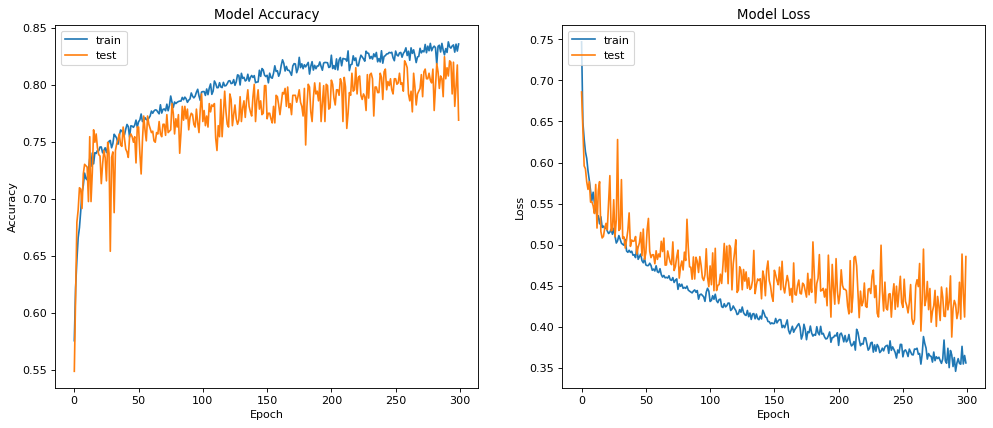

In [22]:
figure(figsize=(15, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [23]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

2021-09-09 14:40:16.343473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [26]:
cm = confusion_matrix(y_true=y_test,y_pred=rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cm_plot_labels = ['Bad','Good']

Confusion matrix
[[708 336]
 [118 904]]


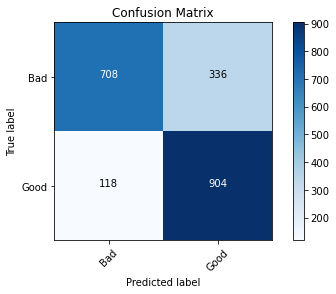

In [29]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7803


[0.5051660537719727, 0.780251681804657]

RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train.shape, y_train.shape

((8262, 11), (8262,))

In [33]:
clf=RandomForestClassifier(n_estimators=200)

In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
y_pred=clf.predict(X_test)

In [36]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 965   79]
 [   0 1022]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1044
           1       0.93      1.00      0.96      1022

    accuracy                           0.96      2066
   macro avg       0.96      0.96      0.96      2066
weighted avg       0.96      0.96      0.96      2066

Accuracy: 0.9617618586640851


KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 922  122]
 [   0 1022]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1044
           1       0.89      1.00      0.94      1022

    accuracy                           0.94      2066
   macro avg       0.95      0.94      0.94      2066
weighted avg       0.95      0.94      0.94      2066

Accuracy: 0.9409486931268151
